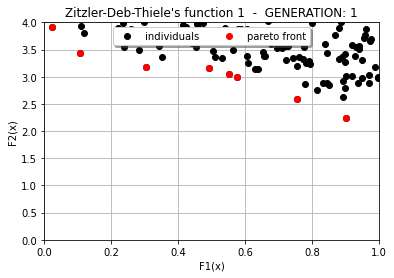

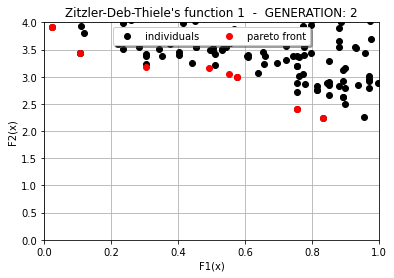

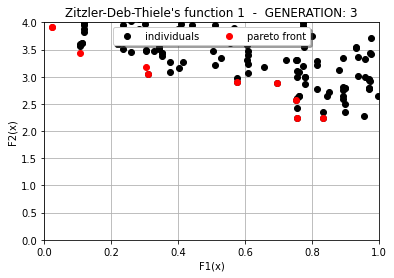

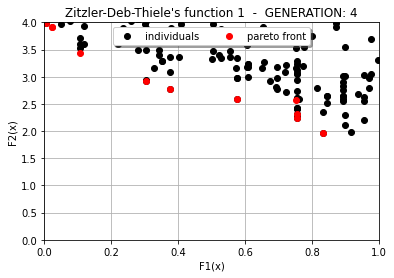

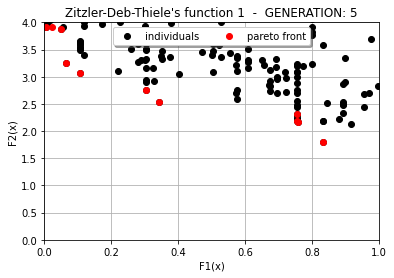

In [13]:
import math
import NPGA
import matplotlib.pyplot as plt
import numpy as np

def scaleMinMax(x, xmin, xmax, mindesired, maxdesired):
    return (x - xmin) / (xmax - xmin) * (maxdesired - mindesired) + mindesired


def graytodec(bin_list):
    """
    Convert from Gray coding to binary coding.
    We assume big endian encoding.
    """
    b = bin_list[0]
    d = int(b) * (2 ** (len(bin_list) - 1))
    for i, e in enumerate(range(len(bin_list) - 2, -1, -1)):
        b = str(int(b != bin_list[i + 1]))
        d += int(b) * (2 ** e)
    return d


def decodechromosome(bits, BitsForEachNumber, SizeVector):
    x = np.zeros((SizeVector,), dtype=np.float64)
    for i in range(SizeVector):
        dec = graytodec(
            bits[(i * BitsForEachNumber): (
                i * BitsForEachNumber + BitsForEachNumber)]
        )
        max_current = math.pow(2, BitsForEachNumber) - 1
        x[i] = scaleMinMax(dec, 0, max_current, 0, 1)
    return x


def ZDT1(x):
    f1 = x[0]
    g = 1 + 9 * (np.sum(x[1:]) / (len(x) - 1))
    h = 1 - np.sqrt(f1 / g)
    f2 = g * h
    return f1, f2


def getfitness(candidate, BitsForEachNumber, SizeVector):
    x = decodechromosome(candidate, BitsForEachNumber, SizeVector)
    F1, F2 = ZDT1(x)
    return [[F1, "minimize"], [F2, "minimize"]]


class StaticGen:
    Generation = 1


def display(statistics):
    f1x = []
    f2x = []
    for point in statistics.ParetoSet:
        f1x.append(point.Fitness[0])
        f2x.append(point.Fitness[1])

    xpop = []
    ypop = []
    for individual in statistics.population:
        xpop.append(individual.Fitness[0])
        ypop.append(individual.Fitness[1])

    plt.figure(1)
    plt.clf()
    plt.axis([0, 1, 0, 4])
    plt.xlabel("F1(x)")
    plt.ylabel("F2(x)")
    plt.plot(xpop, ypop, "ko", label="individuals")
    plt.plot(f1x, f2x, "ro", label="pareto front")
    plt.title(
        "Zitzler-Deb-Thiele's function 1  -  GENERATION: " + str(
            StaticGen.Generation)
    )
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.00), shadow=True,
               ncol=2)
    plt.grid()
    plt.draw()
    plt.pause(0.0001)
    plt.show(block=False)

    StaticGen.Generation = StaticGen.Generation + 1


def test():
    geneset = "01"
    BitsForEachNumber = 16
    SizeVector = 20
    genelen = [BitsForEachNumber * SizeVector]

    def fnDisplay(statistic):
        display(statistic)

    def fnGetFitness(genes):
        return getfitness(genes, BitsForEachNumber, SizeVector)

    optimalFitness = [0, 0]

    GA = NPGA.NichedParetoGeneticAlgorithm(
        fnGetFitness,
        fnDisplay,
        optimalFitness,
        geneset,  # posibles valores de genes (alfabeto)
        genelen,  #
        population_size=200,
        max_generation=5,
        crossover_rate=0.65,
        mutation_rate=1 / 170,
        niche_radius=0.02,
        candidate_size=4,
        prc_tournament_size=0.13,
        fastmode=True,
    )
    GA.Evolution()


test()
plt.show()


In [11]:
print('hola, javi mola mucho')
print('hola, xxxd')

hola, javi mola mucho
hola, xxxd
